In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_path = "../reports"

model_list = ["UNet++", "AttentionUNet", "UNet", "VNet", "NoSkipUNet", "NoSkipVNet"]
model_alias = {"UNet++": "UNet++", "AttentionUNet": "Attention U-Net", "UNet": "U-Net", "VNet": "V-Net", "NoSkipUNet": "NoSkipU-Net", "NoSkipVNet": "NoSkipV-Net"}

anatomy_list = ["BUSI", "GLaS", "Heart", "Spleen"]
anatomy_alias = {"BUSI": "Breast \n (Ultrasound)", "GLaS": "Colon \n (Histology)", "Heart": "Heart \n (MRI)", "Spleen": "Spleen \n (CT)"}

variant_list = ["lower", "low", "in-domain", "high", "higher"]
variant_alias = {"lower": "Hardest", "low": "Harder", "in-domain": "Unperturbed", "high": "Easier", "higher": "Easiest"}

In [3]:
dsc_mean_data = {}
dsc_std_data = {}

for texture_variant in variant_list:
    dsc_mean = pd.DataFrame(columns=model_list,
                    index=anatomy_list)

    dsc_sd = pd.DataFrame(columns=model_list,
                    index=anatomy_list)

    for anatomy in anatomy_list:
        for model_name in model_list:
            result_seed_1 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_1.csv")
            result_seed_2 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_2.csv")
            result_seed_3 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_3.csv")

            seed_1_data = pd.read_csv(result_seed_1)
            seed_1_data = seed_1_data.loc[seed_1_data['Set'] == "test"]

            seed_2_data = pd.read_csv(result_seed_2)
            seed_2_data = seed_2_data.loc[seed_2_data['Set'] == "test"]

            seed_3_data = pd.read_csv(result_seed_3)
            seed_3_data = seed_3_data.loc[seed_3_data['Set'] == "test"]

            dice_scores = np.hstack((seed_1_data["Dice"].to_numpy(), seed_2_data["Dice"].to_numpy(), seed_3_data["Dice"].to_numpy()))

            #print("For anatomy: " + anatomy + " and model: " + model_name + " and texture: " + texture_variant + ", dsc mean: " + str(np.mean(dice_scores)) + ", std: " + str(np.std(dice_scores)))

            dsc_mean[model_name][anatomy] = np.mean(dice_scores)
            dsc_sd[model_name][anatomy] = np.std(dice_scores)
    
    dsc_mean_data[texture_variant] = dsc_mean
    dsc_std_data[texture_variant] = dsc_sd
    
    print("For texture variant: " + str(texture_variant) + " mean scores;")
    print(dsc_mean)
    print("For texture variant: " + str(texture_variant) + " std scores;")
    print(dsc_sd)


For texture variant: lower mean scores;
          UNet++ AttentionUNet      UNet      VNet NoSkipUNet NoSkipVNet
BUSI    0.210779      0.572541  0.560864  0.730226   0.644743     0.8085
GLaS    0.703495       0.69653  0.714557  0.741342   0.712531    0.73426
Heart   0.000224      0.033419  0.076453  0.784073   0.761279   0.871018
Spleen       0.0       0.21485  0.024814  0.001062    0.43442    0.31504
For texture variant: lower std scores;
          UNet++ AttentionUNet      UNet      VNet NoSkipUNet NoSkipVNet
BUSI    0.227502      0.307253  0.318226  0.276251    0.27838    0.18629
GLaS    0.204065      0.225175  0.203467  0.212532   0.202787   0.211647
Heart   0.003067      0.081761  0.111009  0.157066   0.160026   0.082761
Spleen       0.0       0.20725  0.072584  0.017384    0.27026   0.276217
For texture variant: low mean scores;
          UNet++ AttentionUNet      UNet      VNet NoSkipUNet NoSkipVNet
BUSI    0.235959      0.652197  0.676844  0.743612   0.683264   0.814704
GLaS   

In [4]:
for model_name in model_list:
    for anatomy in anatomy_list:
        mean_list = []
        for texture_variant in variant_list:
            mean_list.append(dsc_mean_data[texture_variant][model_name][anatomy])
        mu = np.mean(mean_list)
        sigma = np.std(mean_list)
        cv = sigma/mu
        print("For " + anatomy + " and model: " + model_name + ", CV = " + str(cv))

For BUSI and model: UNet++, CV = 0.4404839394856194
For GLaS and model: UNet++, CV = 0.058227092734076245
For Heart and model: UNet++, CV = 1.8511062962172495
For Spleen and model: UNet++, CV = 1.7977523125901334
For BUSI and model: AttentionUNet, CV = 0.11204129414425568
For GLaS and model: AttentionUNet, CV = 0.05750770580746068
For Heart and model: AttentionUNet, CV = 0.694552731188768
For Spleen and model: AttentionUNet, CV = 0.825928308518146
For BUSI and model: UNet, CV = 0.0771880348429378
For GLaS and model: UNet, CV = 0.04876093732645918
For Heart and model: UNet, CV = 0.4908308008498771
For Spleen and model: UNet, CV = 1.4146816263653537
For BUSI and model: VNet, CV = 0.015202791819638182
For GLaS and model: VNet, CV = 0.03177437206291542
For Heart and model: VNet, CV = 0.055000819481624635
For Spleen and model: VNet, CV = 1.6771896838712546
For BUSI and model: NoSkipUNet, CV = 0.02865866071077355
For GLaS and model: NoSkipUNet, CV = 0.051235903665033146
For Heart and model: 

<Figure size 640x480 with 0 Axes>

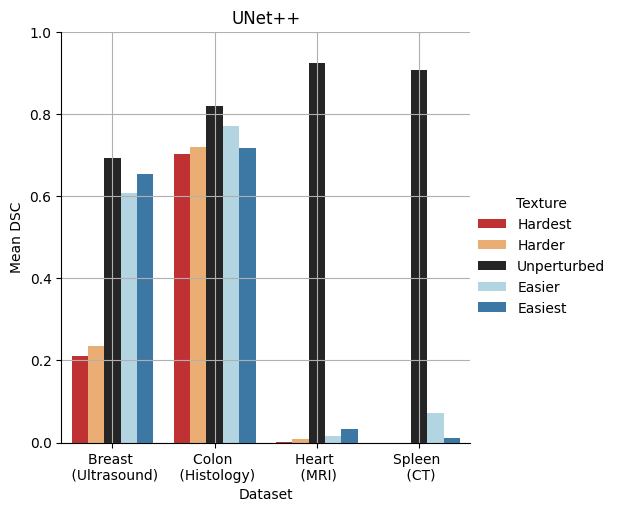

<Figure size 640x480 with 0 Axes>

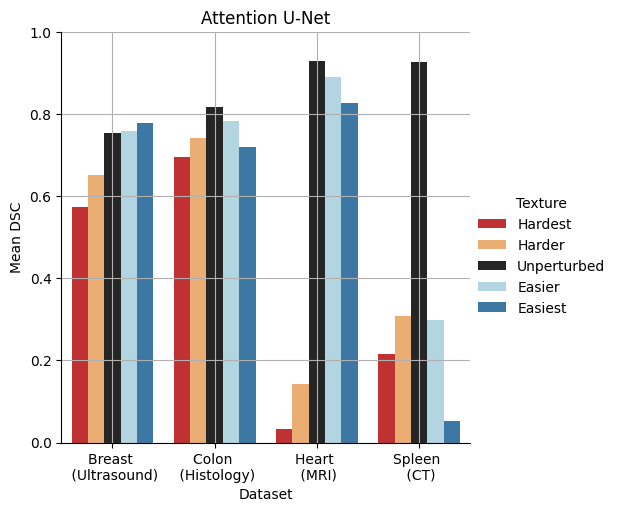

<Figure size 640x480 with 0 Axes>

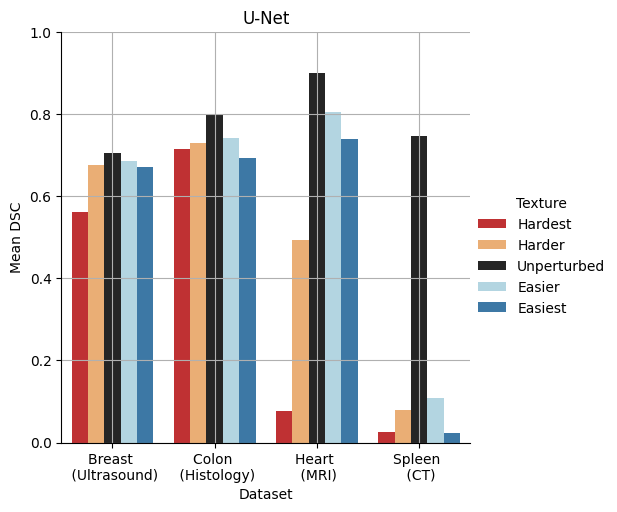

<Figure size 640x480 with 0 Axes>

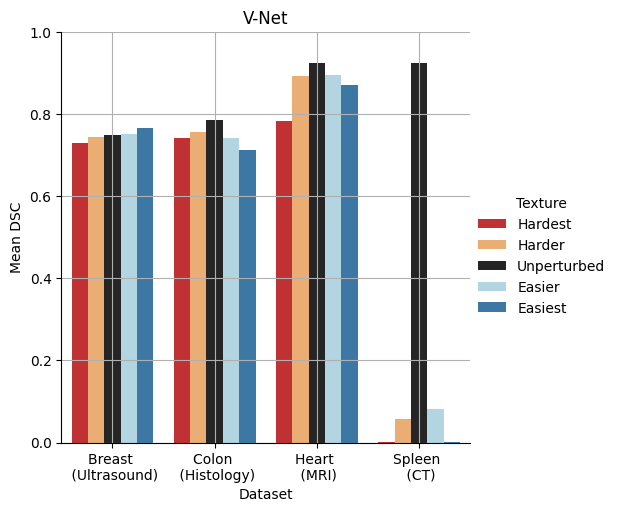

<Figure size 640x480 with 0 Axes>

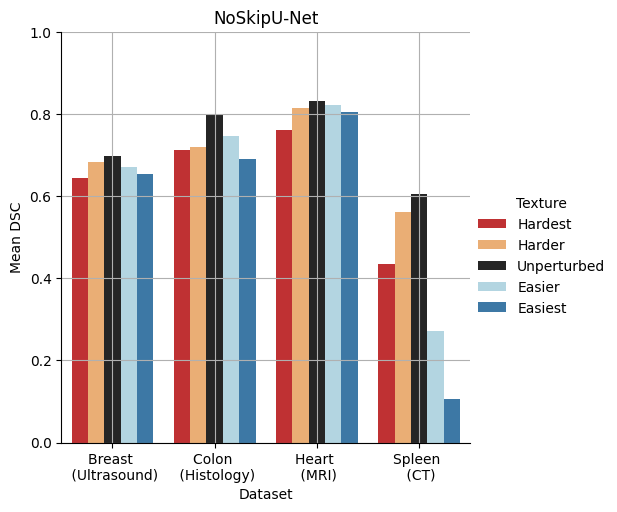

<Figure size 640x480 with 0 Axes>

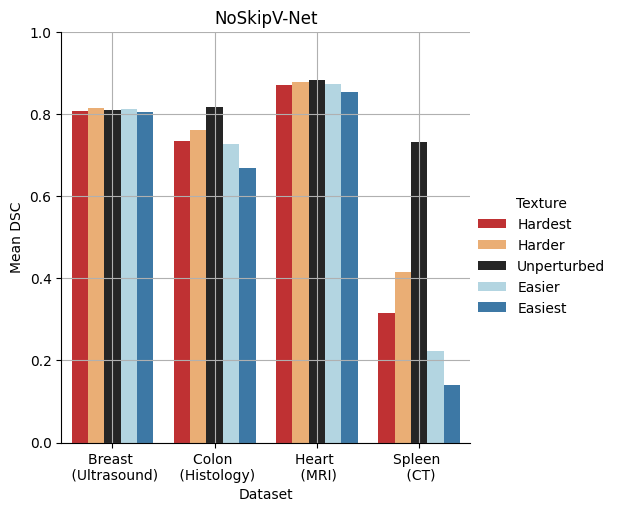

In [5]:
for model_type in model_list:
    data_results = []
    for image_type in anatomy_list:
        for variant in variant_list:
            data_results.append([variant_alias[variant], model_alias[model_type], anatomy_alias[image_type], dsc_mean_data[variant][model_type][image_type]])

    plt.figure()
    df = pd.DataFrame(data_results, columns=["Texture", "Model", "Dataset", "Mean DSC"])
    sns.catplot(data=df, kind="bar", x="Dataset", y="Mean DSC", hue="Texture", palette=sns.color_palette(['#d7191c', '#fdae61', '#252525', '#abd9e9', '#2c7bb6']))
    plt.title(model_alias[model_type])
    plt.grid(True)
    plt.ylim([0.0, 1.0])